In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('data/Questionnaire to Benchmark Explainable AI Methods.csv')

In [5]:
df = df.drop('Timestamp', axis=1)

In [6]:
original_column_names = df.columns
original_column_names.shape

(25,)

In [7]:
new_columns = [f'question {i}' for i in range(1,26)]
df.columns = new_columns
df.head(15)

,question 1,question 2,question 3,question 4,question 5,question 6,question 7,question 8,question 9,question 10,...,question 16,question 17,question 18,question 19,question 20,question 21,question 22,question 23,question 24,question 25
0,No,Bachelor,Other,0,No,2.0,5.0,2.0,4.0,1.0,...,2.0,3.0,1.0,1.0,1.0,1.0,4.0,2.0,4.0,5.0
1,Yes,Master,Data Science,Many,Yes,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,No,Bachelor,Psychology,1,No,6.0,5.0,4.0,5.0,5.0,...,5.0,5.0,4.0,5.0,4.0,6.0,6.0,5.0,6.0,6.0
3,No,Bachelor,Psychology,0,No,5.0,5.0,7.0,5.0,3.0,...,2.0,1.0,1.0,4.0,1.0,6.0,7.0,7.0,3.0,5.0
4,No,Master,Economics/Business,0,Yes,2.0,3.0,3.0,3.0,3.0,...,4.0,5.0,4.0,6.0,4.0,4.0,7.0,6.0,5.0,6.0
5,No,NaN,Engineering,0,No,6.0,5.0,7.0,7.0,6.0,...,1.0,1.0,1.0,1.0,1.0,7.0,7.0,7.0,7.0,7.0
6,No,Graduate,Humanities,0,No,6.0,6.0,6.0,6.0,6.0,...,6.0,2.0,5.0,3.0,2.0,6.0,7.0,7.0,NaN,7.0
7,No,Other,Natural Sciences,0,No,5.0,6.0,4.0,5.0,NaN,...,2.0,1.0,2.0,1.0,1.0,6.0,7.0,6.0,7.0,6.0
8,No,Other,Natural Sciences,0,No,4.0,5.0,5.0,3.0,5.0,...,6.0,5.0,6.0,5.0,6.0,4.0,4.0,3.0,3.0,4.0
9,No,Master,Law,0,No,6.0,6.0,4.0,6.0,5.0,...,1.0,1.0,3.0,1.0,1.0,6.0,6.0,5.0,6.0,6.0


In [8]:
ml_background = df[df['question 3'] == 'AI']
ml_background = ml_background.append(df[df['question 3'] == 'Data Science'])

In [9]:
non_ml_background = df.drop(index=ml_background.index)


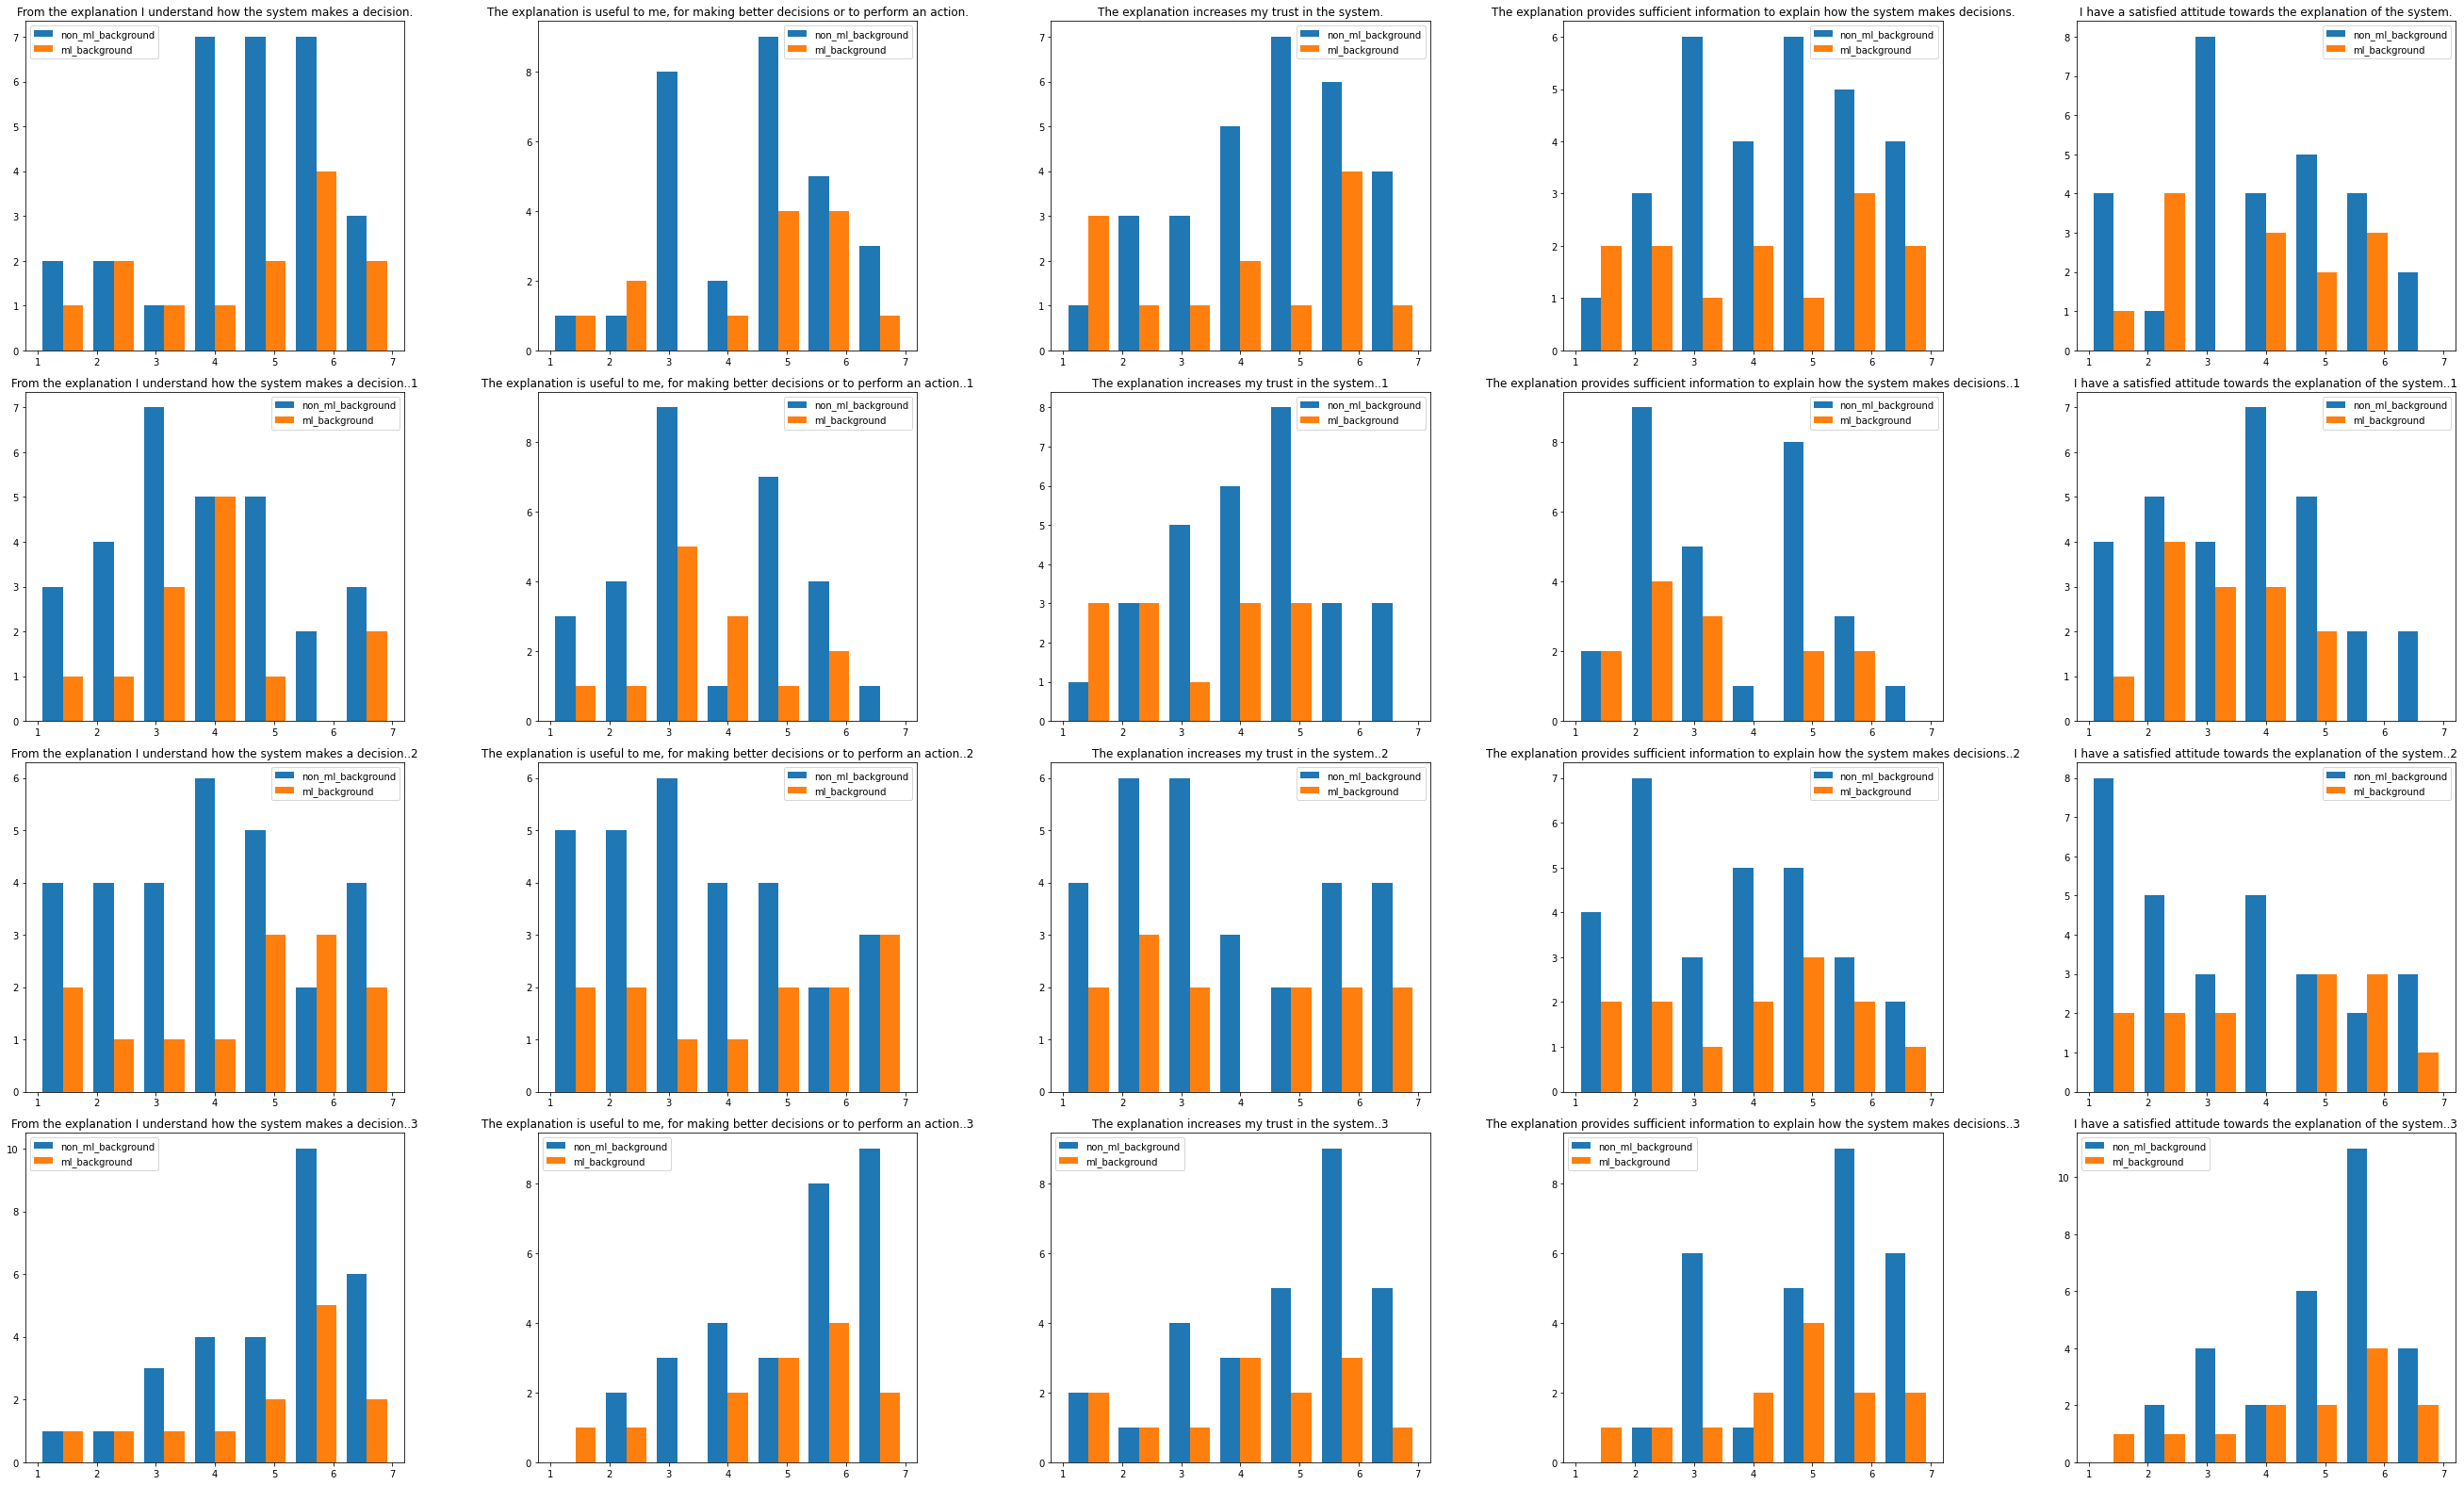

In [52]:
def get_histo_grid(safe_fig=False):
    """
    This function creates a histogram for each question.
    The data is segmented based on ML-Background
    @param safe_fig: defines if the figure is saved as .png
    @return: None
    """
    fig, axs = plt.subplots(4,5)
    fig.set_size_inches(37, 22)
    # fig.subplots_adjust(hspace=1.0, wspace=1.0)
    for i in range(6,26):
        data = [non_ml_background[f'question {i}'], ml_background[f'question {i}']]
        row = (i-6)//5
        col = (i-6)%5
        # axs[row,col].set_size_inches(18.5, 10.5)
        axs[row,col].hist(data, bins=7, histtype='bar',  label=['non_ml_background', 'ml_background'])
        axs[row,col].set_title(original_column_names[i-1])
        axs[row,col].legend()
    # plt.legend()
    plt.tight_layout()
    if safe_fig:
        plt.savefig('histo_grid')

get_histo_grid(safe_fig=True)


# some regressions



In [61]:
from sklearn.linear_model import LinearRegression


def get_regression_coeff(att_1=None, att_2=None):
    """
    This function returns all linear regression coefficients.
    if att_1 and att_2 are specified 1 regression coefficient is returned
    @param att_1: column index you want to regress from
    @param att_2: column index you want to regress to
    @return: one or all regression coefficients
    """
    if att_1 == None and att_2 == None:
        coeffs = np.zeros((19,19))
        for i in range(6,25):
            for j in range(6,25):
                X = df.iloc[:,i].values.reshape(-1,1)
                Y = df.iloc[:,j].values.reshape(-1,1)

                lin_reg = LinearRegression()
                lin_reg.fit(X,Y)
                coeffs[i-6,j-6] = lin_reg.coef_
        return coeffs
    else:
        X = df.iloc[:,att_1].values.reshape(-1,1)
        Y = df.iloc[:,att_2].values.reshape(-1,1)
        lin_reg = LinearRegression()
        lin_reg.fit(X,Y)
        return lin_reg.coef_
get_regression_coeff()

array([[1.        , 0.7147016 , 0.75545852, 0.80058224, 0.27802038,
        0.26200873, 0.41484716, 0.23871907, 0.18267831, 0.4279476 ,
        0.3588064 , 0.43304221, 0.15866084, 0.27438137, 0.41630277,
        0.45050946, 0.48981077, 0.3202329 , 0.40029112],
       [0.57674236, 1.        , 0.46397807, 0.58476899, 0.14565388,
        0.10591229, 0.46906813, 0.07008614, 0.10277995, 0.36530932,
        0.33379013, 0.58907596, 0.34475333, 0.42501958, 0.39702428,
        0.3811668 , 0.56362569, 0.27055599, 0.3114722 ],
       [0.60987074, 0.46415981, 1.        , 0.72032902, 0.37955347,
        0.38836663, 0.35840188, 0.51645123, 0.36016451, 0.3560517 ,
        0.39306698, 0.37720329, 0.35428907, 0.31316099, 0.35898942,
        0.2773208 , 0.33901293, 0.25146886, 0.32197415],
       [0.73300755, 0.6634829 , 0.81697024, 1.        , 0.45246557,
        0.3893825 , 0.4848956 , 0.54464682, 0.43647268, 0.57641048,
        0.56730342, 0.69702355, 0.48911595, 0.66414927, 0.59773434,
        0.474